/var/folders/54/_lmmyy6j4d1662_55qvwd1k40000gn/T/ipykernel_65457/2284184430.py:48: RuntimeWarning: invalid value encountered in arcsin
  np.arcsin(x_coarse), np.nan), 'orange', '-'),
/var/folders/54/_lmmyy6j4d1662_55qvwd1k40000gn/T/ipykernel_65457/2284184430.py:50: RuntimeWarning: invalid value encountered in arccos
  np.arccos(x_coarse), np.nan), 'brown', '-'),
/var/folders/54/_lmmyy6j4d1662_55qvwd1k40000gn/T/ipykernel_65457/2284184430.py:59: RuntimeWarning: invalid value encountered in log
  ("log(x)", np.where(x_coarse > 0, np.log(x_coarse), np.nan), 'purple', '-')


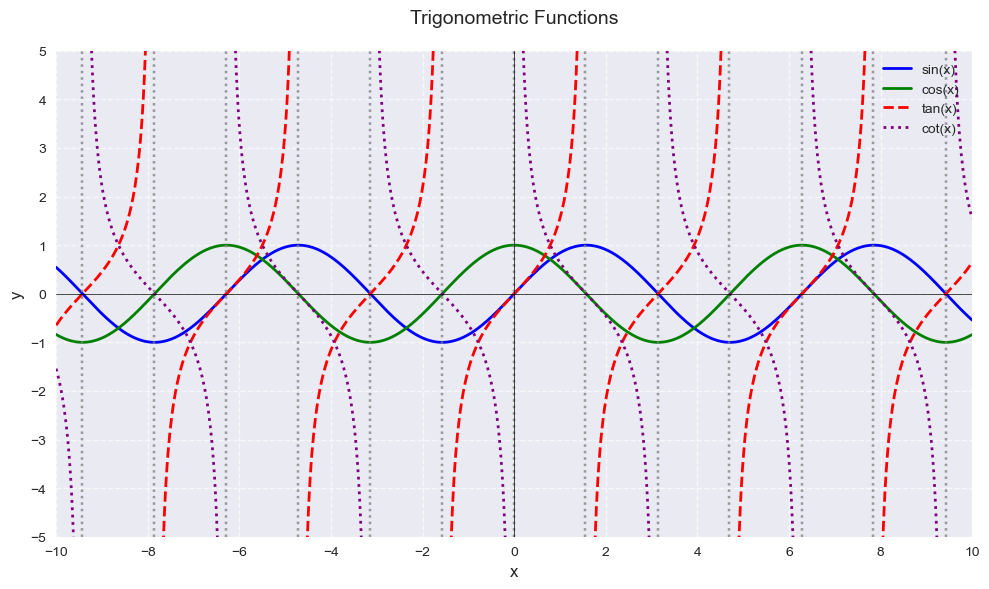

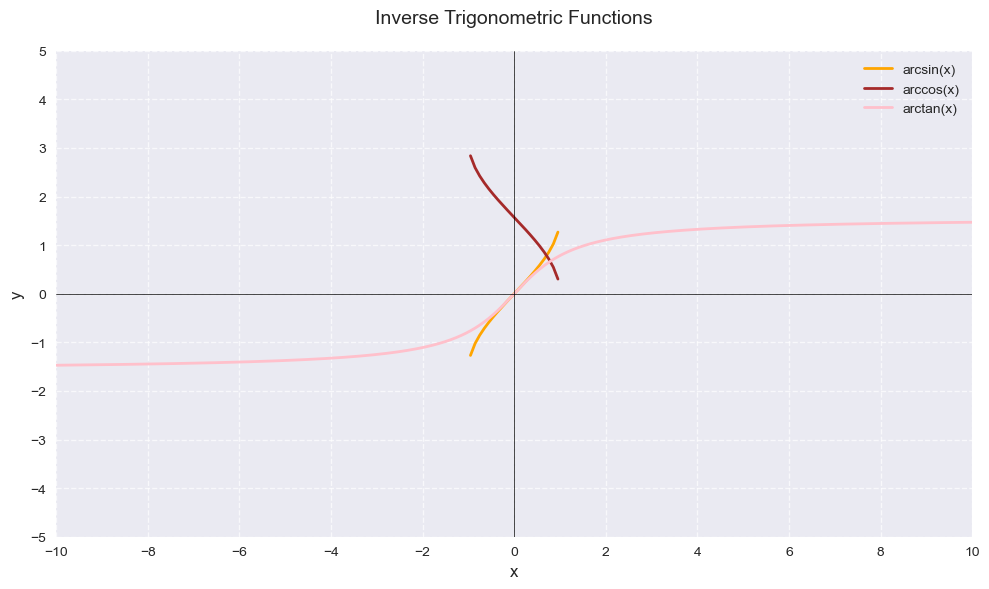

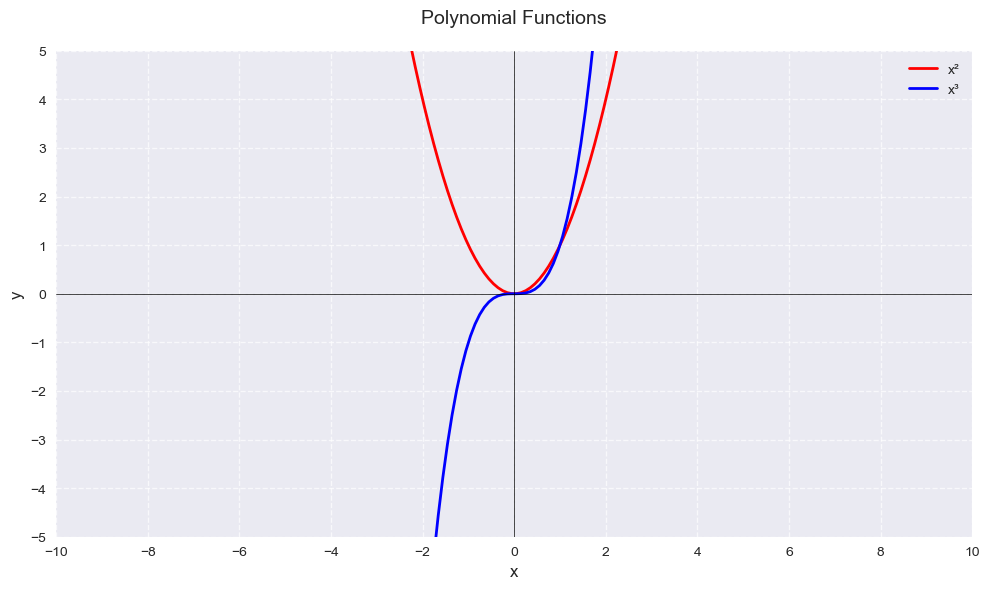

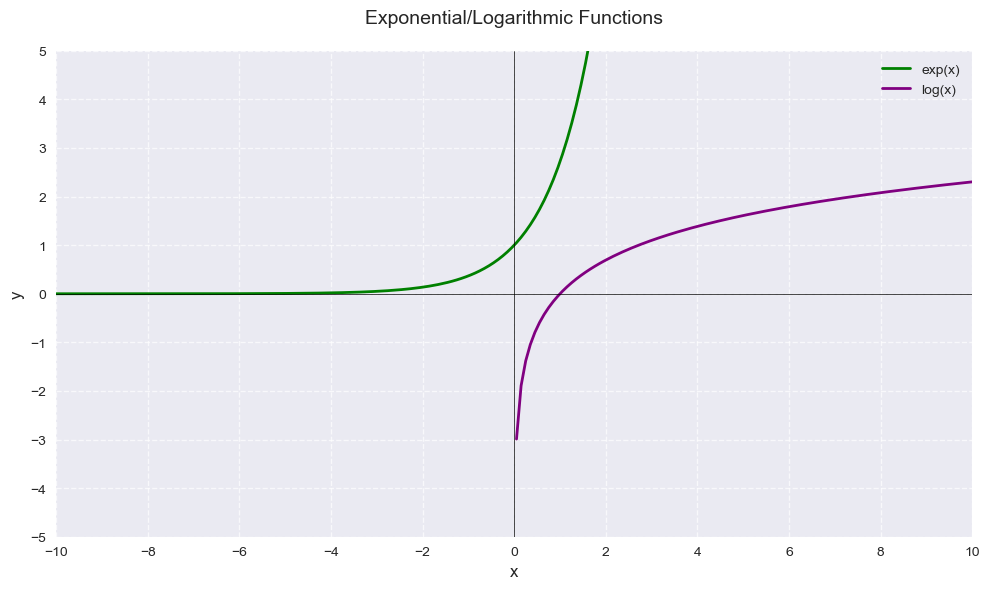

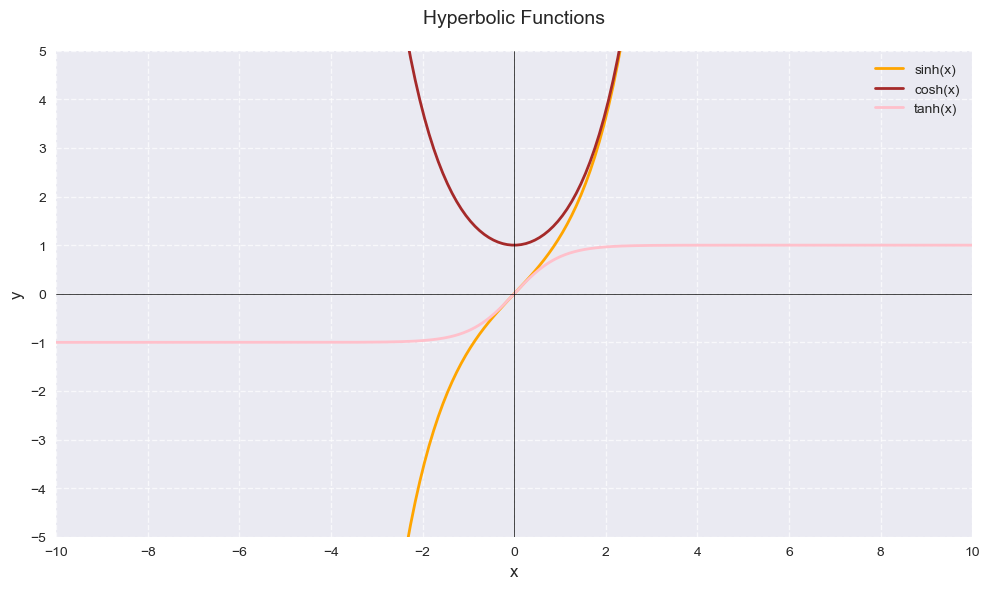

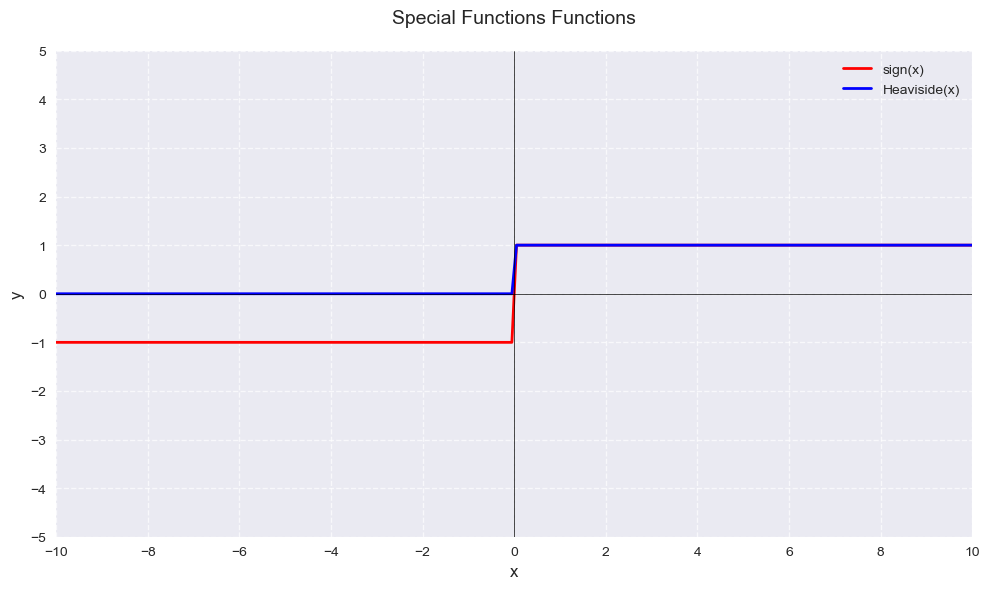

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


plt.style.use('seaborn-v0_8')


def configure_plot(ax, title):
    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, which='both', linestyle='--', alpha=0.7)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-5, 5)


def plot_with_asymptotes(ax, x, y, label, color, style='-'):
    y_masked = np.ma.masked_where(np.abs(y) > 10, y)
    ax.plot(x, y_masked, linestyle=style, label=label, color=color, linewidth=2)

    diff = np.diff(np.sign(y))
    asymptotes = np.where(np.abs(diff) > 1)[0]
    for a in asymptotes:
        ax.axvline(x[a], color='gray', linestyle=':', alpha=0.5)


x_dense = np.linspace(-10, 10, 1000)
x_coarse = np.linspace(-10, 10, 200)

functions = {
    "Trigonometric": [
        ("sin(x)", np.sin(x_dense), 'blue', '-'),
        ("cos(x)", np.cos(x_dense), 'green', '-'),
        ("tan(x)", np.tan(x_dense), 'red', '--'),
        ("cot(x)", np.cos(x_dense)/np.sin(x_dense), 'purple', ':')
    ],
    "Inverse Trigonometric": [
        ("arcsin(x)", np.where((x_coarse >= -1) & (x_coarse <= 1), 
         np.arcsin(x_coarse), np.nan), 'orange', '-'),
        ("arccos(x)", np.where((x_coarse >= -1) & (x_coarse <= 1), 
         np.arccos(x_coarse), np.nan), 'brown', '-'),
        ("arctan(x)", np.arctan(x_dense), 'pink', '-')
    ],
    "Polynomial": [
        ("x²", x_coarse**2, 'red', '-'),
        ("x³", x_coarse**3, 'blue', '-')
    ],
    "Exponential/Logarithmic": [
        ("exp(x)", np.exp(x_coarse), 'green', '-'),
        ("log(x)", np.where(x_coarse > 0, np.log(x_coarse), np.nan), 'purple', '-')
    ],
    "Hyperbolic": [
        ("sinh(x)", np.sinh(x_coarse), 'orange', '-'),
        ("cosh(x)", np.cosh(x_coarse), 'brown', '-'),
        ("tanh(x)", np.tanh(x_dense), 'pink', '-')
    ],
    "Special Functions": [
        ("sign(x)", np.sign(x_coarse), 'red', '-'),
        ("Heaviside(x)", np.heaviside(x_coarse, 0.5), 'blue', '-')
    ]
}


for category, func_list in functions.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for name, y, color, style in func_list:
        if name in ['tan(x)', 'cot(x)']:
            plot_with_asymptotes(ax, x_dense, y, name, color, style)
        else:
            ax.plot(x_coarse if len(y) == len(x_coarse) else x_dense, 
                   y, label=name, color=color, linestyle=style, linewidth=2)
    
    configure_plot(ax, f'{category} Functions')
    plt.tight_layout()
    plt.show()